먼저, 기본 가정으로 3가지 버전을 비교하고\
option-reservation-cost (5-> 3 ->1)로 변할 때, 3가지 버전 비교\
option-exercise-cost (27->30->33)로 변할 때, 3가지 버전 비교\
inventory-holding-cost (8->5->2)로 변할 때, 3가치 버전 비교 

### 기존 Assumption 사용해서 3가지 버전의 disruption 비교 

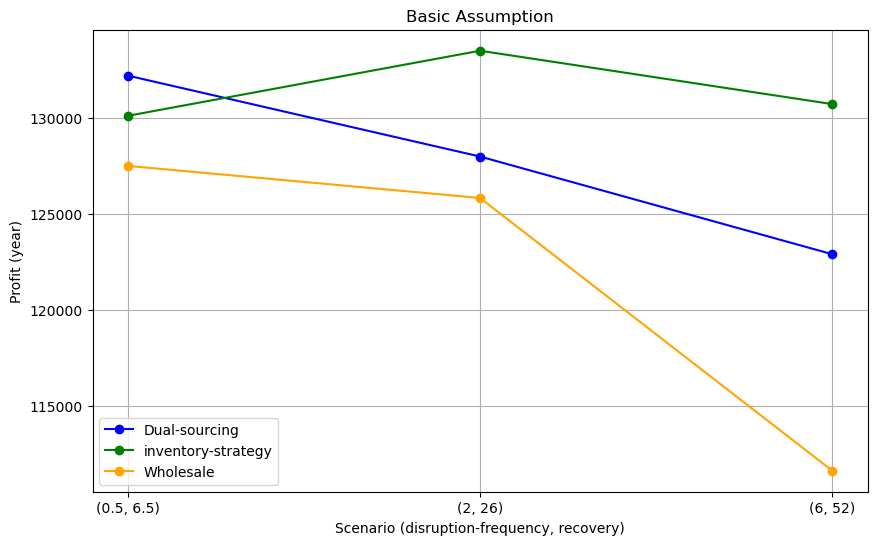

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# 파일 이름 리스트
file_names = [
    "Data_Dual-sourcing_0.5_6.5_0.1.csv",
    "Data_Dual-sourcing_2_26_0.1.csv",
    "Data_Dual-sourcing_6_52_0.1.csv",
    "Data_inventory-strategy_0.5_6.5_0.1.csv",
    "Data_inventory-strategy_2_26_0.1.csv",
    "Data_inventory-strategy_6_52_0.1.csv",
    "Data_Wholesale_0.5_6.5_0.1.csv",
    "Data_Wholesale_2_26_0.1.csv",
    "Data_Wholesale_6_52_0.1.csv",
]

# 라벨과 x축 정보
labels = ["Dual-sourcing", "inventory-strategy", "Wholesale"]
x_ticks = [(0.5, 6.5), (2, 26), (6, 52)]

# 색상 설정
colors = {"Dual-sourcing": "blue", "inventory-strategy": "green", "Wholesale": "orange"}

# 데이터를 저장할 딕셔너리
data = {label: [] for label in labels}

# 파일에서 profit의 마지막 값을 추출
for file_name in file_names:
    # CSV 파일 읽기
    df = pd.read_csv(file_name)
    
    # profit 열의 마지막 값 가져오기
    last_profit = df['profit'].iloc[-1]
    last_profit = last_profit / 200

    # 라벨에 따라 값 추가
    if "Dual-sourcing" in file_name:
        data["Dual-sourcing"].append(last_profit)
    elif "inventory-strategy" in file_name:
        data["inventory-strategy"].append(last_profit)
    elif "Wholesale" in file_name:
        data["Wholesale"].append(last_profit)

# 라인 플롯 생성
plt.figure(figsize=(10, 6))

for label in labels:
    plt.plot(["(0.5, 6.5)", "(2, 26)", "(6, 52)"], data[label], marker='o', label=label, color=colors[label])

# 플롯 꾸미기
plt.title("Basic Assumption")
plt.xlabel("Scenario (disruption-frequency, recovery)")
plt.ylabel("Profit (year)")
plt.legend()
plt.grid(True)

# 플롯 표시
plt.show()



{'Dual-sourcing': [np.float64(3.685503492815377), np.float64(1.7139814766988586), np.float64(10.097206080922213)], 'inventory-strategy': [np.float64(2.042462979650777), np.float64(6.090642792703705), np.float64(17.09607405114568)]}


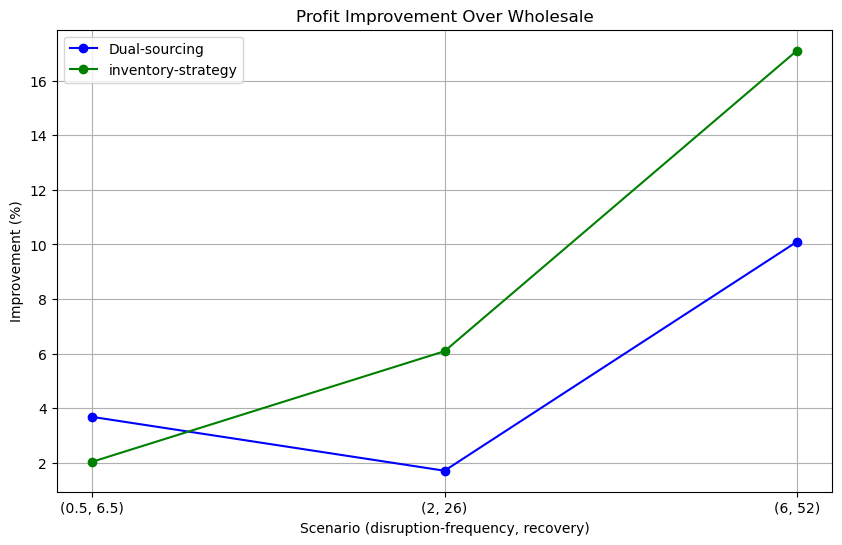

In [51]:
import pandas as pd
import matplotlib.pyplot as plt

# 파일 이름 리스트
file_names = [
    "Data_Dual-sourcing_0.5_6.5_0.1.csv",
    "Data_Dual-sourcing_2_26_0.1.csv",
    "Data_Dual-sourcing_6_52_0.1.csv",
    "Data_inventory-strategy_0.5_6.5_0.1.csv",
    "Data_inventory-strategy_2_26_0.1.csv",
    "Data_inventory-strategy_6_52_0.1.csv",
    "Data_Wholesale_0.5_6.5_0.1.csv",
    "Data_Wholesale_2_26_0.1.csv",
    "Data_Wholesale_6_52_0.1.csv",
]

# 라벨과 x축 정보
labels = ["Dual-sourcing", "inventory-strategy", "Wholesale"]
x_ticks = [(0.5, 6.5), (2, 26), (6, 52)]

# 색상 설정
colors = {"Dual-sourcing": "blue", "inventory-strategy": "green", "Wholesale": "orange"}

# 데이터를 저장할 딕셔너리
data = {label: [] for label in labels}

# 파일에서 profit의 마지막 값을 추출
for file_name in file_names:
    # CSV 파일 읽기
    df = pd.read_csv(file_name)
    
    # profit 열의 마지막 값 가져오기
    last_profit = df['profit'].iloc[-1]
    last_profit = last_profit / 200

    # 라벨에 따라 값 추가
    if "Dual-sourcing" in file_name:
        data["Dual-sourcing"].append(last_profit)
    elif "inventory-strategy" in file_name:
        data["inventory-strategy"].append(last_profit)
    elif "Wholesale" in file_name:
        data["Wholesale"].append(last_profit)

# 수익 개선 비율 계산
improvement_ratios = {
    "Dual-sourcing": [],
    "inventory-strategy": []
}

for i in range(len(data["Wholesale"])):
    wholesale_profit = data["Wholesale"][i]
    dual_improvement = ((data["Dual-sourcing"][i] - wholesale_profit) / wholesale_profit) * 100
    inventory_improvement = ((data["inventory-strategy"][i] - wholesale_profit) / wholesale_profit) * 100
    improvement_ratios["Dual-sourcing"].append(dual_improvement)
    improvement_ratios["inventory-strategy"].append(inventory_improvement)

print(improvement_ratios)
# 수익 개선 비율 플롯 생성
plt.figure(figsize=(10, 6))

for label in improvement_ratios:
    plt.plot([f"({x[0]}, {x[1]})" for x in x_ticks], improvement_ratios[label], marker='o', label=label, color=colors[label])

# 플롯 꾸미기
plt.title("Profit Improvement Over Wholesale")
plt.xlabel("Scenario (disruption-frequency, recovery)")
plt.ylabel("Improvement (%)")
plt.legend()
plt.grid(True)

# 플롯 표시
plt.show()

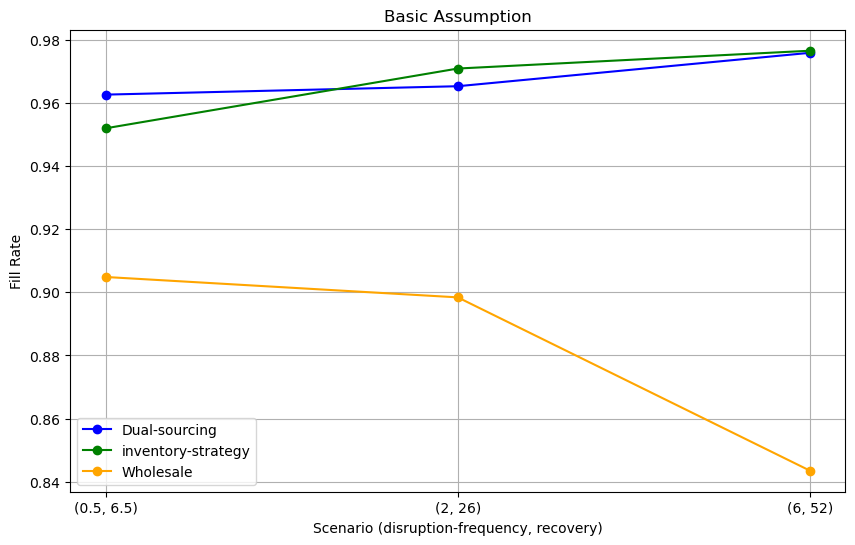

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# 파일 이름 리스트
file_names = [
    "Data_Dual-sourcing_0.5_6.5_0.1.csv",
    "Data_Dual-sourcing_2_26_0.1.csv",
    "Data_Dual-sourcing_6_52_0.1.csv",
    "Data_inventory-strategy_0.5_6.5_0.1.csv",
    "Data_inventory-strategy_2_26_0.1.csv",
    "Data_inventory-strategy_6_52_0.1.csv",
    "Data_Wholesale_0.5_6.5_0.1.csv",
    "Data_Wholesale_2_26_0.1.csv",
    "Data_Wholesale_6_52_0.1.csv",
]

# 라벨과 x축 정보
labels = ["Dual-sourcing", "inventory-strategy", "Wholesale"]
x_ticks = ["(0.5, 6.5)", "(2, 26)", "(6, 52)"]

# 색상 설정
colors = {"Dual-sourcing": "blue", "inventory-strategy": "green", "Wholesale": "orange"}

# 데이터를 저장할 딕셔너리
data = {label: [] for label in labels}

# 파일에서 fill rate 계산
def calculate_fill_rate(file_name):
    df = pd.read_csv(file_name)
    total_shortage = df['shortage-amount'].sum()
    total_demand = df['common-demand'].sum()
    fill_rate = 1 - (total_shortage / total_demand) if total_demand > 0 else 0
    return fill_rate

for file_name in file_names:
    # Fill rate 계산
    fill_rate = calculate_fill_rate(file_name)

    # 라벨에 따라 값 추가
    if "Dual-sourcing" in file_name:
        data["Dual-sourcing"].append(fill_rate)
    elif "inventory-strategy" in file_name:
        data["inventory-strategy"].append(fill_rate)
    elif "Wholesale" in file_name:
        data["Wholesale"].append(fill_rate)

# 라인 플롯 생성
plt.figure(figsize=(10, 6))

for label in labels:
    plt.plot(x_ticks, data[label], marker='o', label=label, color=colors[label])

# 플롯 꾸미기
plt.title("Basic Assumption")
plt.xlabel("Scenario (disruption-frequency, recovery)")
plt.ylabel("Fill Rate")
plt.legend()
plt.grid(True)

# 플롯 표시
plt.show()

## reservation-cost 변화 (1, 3, 5, 7)

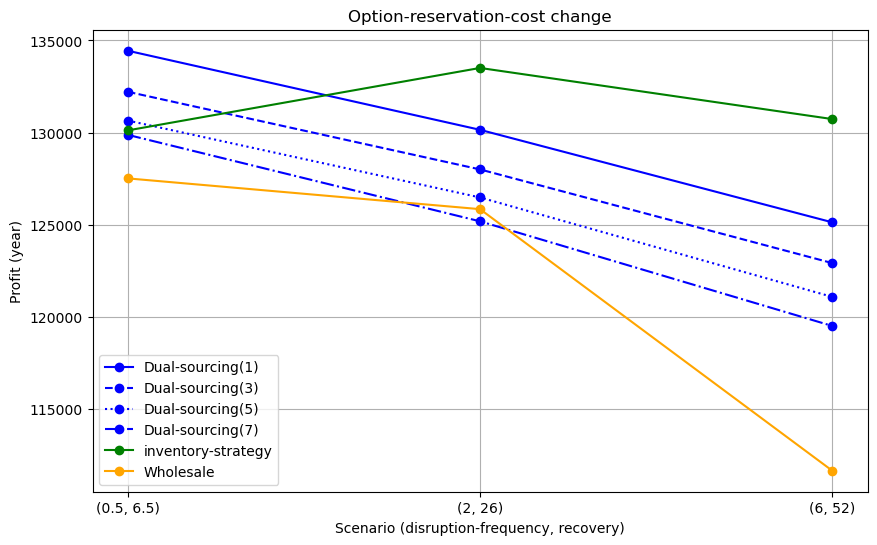

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# 파일 이름 리스트
file_names = [
    "Data_Dual-sourcing_0.5_6.5_0.1_1.csv",
    "Data_Dual-sourcing_2_26_0.1_1.csv",
    "Data_Dual-sourcing_6_52_0.1_1.csv",
    "Data_Dual-sourcing_0.5_6.5_0.1_3.csv",
    "Data_Dual-sourcing_2_26_0.1_3.csv",
    "Data_Dual-sourcing_6_52_0.1_3.csv",
    "Data_Dual-sourcing_0.5_6.5_0.1_5.csv",
    "Data_Dual-sourcing_2_26_0.1_5.csv",
    "Data_Dual-sourcing_6_52_0.1_5.csv",
    "Data_Dual-sourcing_0.5_6.5_0.1_7.csv",
    "Data_Dual-sourcing_2_26_0.1_7.csv",
    "Data_Dual-sourcing_6_52_0.1_7.csv",
    "Data_inventory-strategy_0.5_6.5_0.1.csv",
    "Data_inventory-strategy_2_26_0.1.csv",
    "Data_inventory-strategy_6_52_0.1.csv",
    "Data_Wholesale_0.5_6.5_0.1.csv",
    "Data_Wholesale_2_26_0.1.csv",
    "Data_Wholesale_6_52_0.1.csv",
]

# 라벨과 x축 정보
labels = ["Dual-sourcing(1)", "Dual-sourcing(3)", "Dual-sourcing(5)", "Dual-sourcing(7)", "inventory-strategy", "Wholesale"]
x_ticks = ["(0.5, 6.5)", "(2, 26)", "(6, 52)"]

# 색상 및 스타일 설정
colors = {
    "Dual-sourcing(1)": "blue",
    "Dual-sourcing(3)": "blue",
    "Dual-sourcing(5)": "blue",
    "Dual-sourcing(7)": "blue",
    "inventory-strategy": "green",
    "Wholesale": "orange"
}
linestyles = {
    "Dual-sourcing(1)": "-",
    "Dual-sourcing(3)": "--",
    "Dual-sourcing(5)": ":",
    "Dual-sourcing(7)": "-.",
    "inventory-strategy": "-",
    "Wholesale": "-"
}

# 데이터를 저장할 딕셔너리
data = {label: [] for label in labels}

# 파일에서 profit의 마지막 값을 추출
for file_name in file_names:
    # CSV 파일 읽기
    df = pd.read_csv(file_name)

    # profit 열의 마지막 값 가져오기
    last_profit = df['profit'].iloc[-1]
    last_profit = last_profit / 200

    # 라벨에 따라 값 추가
    if "Dual-sourcing_0.5_6.5_0.1_1" in file_name or "Dual-sourcing_2_26_0.1_1" in file_name or "Dual-sourcing_6_52_0.1_1" in file_name:
        data["Dual-sourcing(1)"].append(last_profit)
    elif "Dual-sourcing_0.5_6.5_0.1_3" in file_name or "Dual-sourcing_2_26_0.1_3" in file_name or "Dual-sourcing_6_52_0.1_3" in file_name:
        data["Dual-sourcing(3)"].append(last_profit)
    elif "Dual-sourcing_0.5_6.5_0.1_5" in file_name or "Dual-sourcing_2_26_0.1_5" in file_name or "Dual-sourcing_6_52_0.1_5" in file_name:
        data["Dual-sourcing(5)"].append(last_profit)
    elif "Dual-sourcing_0.5_6.5_0.1_7" in file_name or "Dual-sourcing_2_26_0.1_7" in file_name or "Dual-sourcing_6_52_0.1_7" in file_name:
        data["Dual-sourcing(7)"].append(last_profit)
    elif "inventory-strategy" in file_name:
        data["inventory-strategy"].append(last_profit)
    elif "Wholesale" in file_name:
        data["Wholesale"].append(last_profit)

# 라인 플롯 생성
plt.figure(figsize=(10, 6))

for label in labels:
    plt.plot(x_ticks, data[label], marker='o', label=label, color=colors[label], linestyle=linestyles[label])

# 플롯 꾸미기
plt.title("Option-reservation-cost change")
plt.xlabel("Scenario (disruption-frequency, recovery)")
plt.ylabel("Profit (year)")
plt.legend()
plt.grid(True)

# 플롯 표시
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 파일 이름 리스트
file_names = [
    "Data_Dual-sourcing_0.5_6.5_0.1_1.csv",
    "Data_Dual-sourcing_2_26_0.1_1.csv",
    "Data_Dual-sourcing_6_52_0.1_1.csv",
    "Data_Dual-sourcing_0.5_6.5_0.1_3.csv",
    "Data_Dual-sourcing_2_26_0.1_3.csv",
    "Data_Dual-sourcing_6_52_0.1_3.csv",
    "Data_Dual-sourcing_0.5_6.5_0.1_5.csv",
    "Data_Dual-sourcing_2_26_0.1_5.csv",
    "Data_Dual-sourcing_6_52_0.1_5.csv",
    "Data_Dual-sourcing_0.5_6.5_0.1_7.csv",
    "Data_Dual-sourcing_2_26_0.1_7.csv",
    "Data_Dual-sourcing_6_52_0.1_7.csv",
    "Data_inventory-strategy_0.5_6.5_0.1.csv",
    "Data_inventory-strategy_2_26_0.1.csv",
    "Data_inventory-strategy_6_52_0.1.csv",
    "Data_Wholesale_0.5_6.5_0.1.csv",
    "Data_Wholesale_2_26_0.1.csv",
    "Data_Wholesale_6_52_0.1.csv",
]

# 라벨과 x축 정보
labels = ["Dual-sourcing(1)", "Dual-sourcing(3)", "Dual-sourcing(5)", "Dual-sourcing(7)", "inventory-strategy", "Wholesale"]
x_ticks = ["(0.5, 6.5)", "(2, 26)", "(6, 52)"]

# 색상 및 스타일 설정
colors = {
    "Dual-sourcing(1)": "blue",
    "Dual-sourcing(3)": "blue",
    "Dual-sourcing(5)": "blue",
    "Dual-sourcing(7)": "blue",
    "inventory-strategy": "green",
    "Wholesale": "orange"
}
linestyles = {
    "Dual-sourcing(1)": "-",
    "Dual-sourcing(3)": "--",
    "Dual-sourcing(5)": ":",
    "Dual-sourcing(7)": "-.",
    "inventory-strategy": "-",
    "Wholesale": "-"
}

# 데이터를 저장할 딕셔너리
data = {label: [] for label in labels}

# 파일에서 profit의 마지막 값을 추출
for file_name in file_names:
    # CSV 파일 읽기
    df = pd.read_csv(file_name)

    # profit 열의 마지막 값 가져오기
    last_profit = df['profit'].iloc[-1]
    last_profit = last_profit / 200

    # 라벨에 따라 값 추가
    if "Dual-sourcing_0.5_6.5_0.1_1" in file_name or "Dual-sourcing_2_26_0.1_1" in file_name or "Dual-sourcing_6_52_0.1_1" in file_name:
        data["Dual-sourcing(1)"].append(last_profit)
    elif "Dual-sourcing_0.5_6.5_0.1_3" in file_name or "Dual-sourcing_2_26_0.1_3" in file_name or "Dual-sourcing_6_52_0.1_3" in file_name:
        data["Dual-sourcing(3)"].append(last_profit)
    elif "Dual-sourcing_0.5_6.5_0.1_5" in file_name or "Dual-sourcing_2_26_0.1_5" in file_name or "Dual-sourcing_6_52_0.1_5" in file_name:
        data["Dual-sourcing(5)"].append(last_profit)
    elif "Dual-sourcing_0.5_6.5_0.1_7" in file_name or "Dual-sourcing_2_26_0.1_7" in file_name or "Dual-sourcing_6_52_0.1_7" in file_name:
        data["Dual-sourcing(7)"].append(last_profit)
    elif "inventory-strategy" in file_name:
        data["inventory-strategy"].append(last_profit)
    elif "Wholesale" in file_name:
        data["Wholesale"].append(last_profit)

# 라인 플롯 생성
plt.figure(figsize=(10, 6))

for label in labels:
    plt.plot(x_ticks, data[label], marker='o', label=label, color=colors[label], linestyle=linestyles[label])

# 플롯 꾸미기
plt.title("Option-reservation-cost change")
plt.xlabel("Scenario (disruption-frequency, recovery)")
plt.ylabel("Profit (year)")
plt.legend()
plt.grid(True)

# 플롯 표시
plt.show()

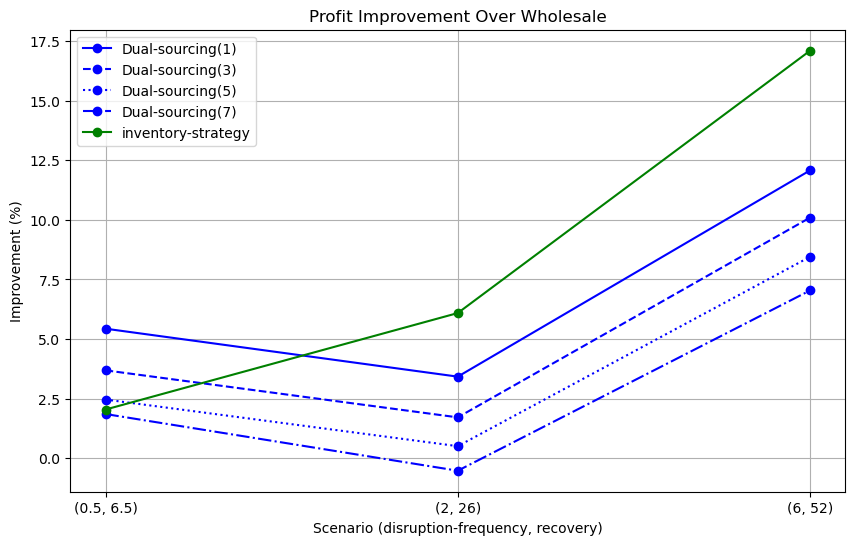

In [36]:
import pandas as pd
import matplotlib.pyplot as plt

# 파일 이름 리스트
file_names = [
    "Data_Dual-sourcing_0.5_6.5_0.1_1.csv",
    "Data_Dual-sourcing_2_26_0.1_1.csv",
    "Data_Dual-sourcing_6_52_0.1_1.csv",
    "Data_Dual-sourcing_0.5_6.5_0.1_3.csv",
    "Data_Dual-sourcing_2_26_0.1_3.csv",
    "Data_Dual-sourcing_6_52_0.1_3.csv",
    "Data_Dual-sourcing_0.5_6.5_0.1_5.csv",
    "Data_Dual-sourcing_2_26_0.1_5.csv",
    "Data_Dual-sourcing_6_52_0.1_5.csv",
    "Data_Dual-sourcing_0.5_6.5_0.1_7.csv",
    "Data_Dual-sourcing_2_26_0.1_7.csv",
    "Data_Dual-sourcing_6_52_0.1_7.csv",
    "Data_inventory-strategy_0.5_6.5_0.1.csv",
    "Data_inventory-strategy_2_26_0.1.csv",
    "Data_inventory-strategy_6_52_0.1.csv",
    "Data_Wholesale_0.5_6.5_0.1.csv",
    "Data_Wholesale_2_26_0.1.csv",
    "Data_Wholesale_6_52_0.1.csv",
]

# 라벨과 x축 정보
labels = ["Dual-sourcing(1)", "Dual-sourcing(3)", "Dual-sourcing(5)", "Dual-sourcing(7)", "inventory-strategy", "Wholesale"]
x_ticks = ["(0.5, 6.5)", "(2, 26)", "(6, 52)"]

# 색상 및 스타일 설정
colors = {
    "Dual-sourcing(1)": "blue",
    "Dual-sourcing(3)": "blue",
    "Dual-sourcing(5)": "blue",
    "Dual-sourcing(7)": "blue",
    "inventory-strategy": "green",
    "Wholesale": "orange"
}
linestyles = {
    "Dual-sourcing(1)": "-",
    "Dual-sourcing(3)": "--",
    "Dual-sourcing(5)": ":",
    "Dual-sourcing(7)": "-.",
    "inventory-strategy": "-",
    "Wholesale": "-"
}

# 데이터를 저장할 딕셔너리
data = {label: [] for label in labels}

# 파일에서 profit의 마지막 값을 추출
for file_name in file_names:
    # CSV 파일 읽기
    df = pd.read_csv(file_name)

    # profit 열의 마지막 값 가져오기
    last_profit = df['profit'].iloc[-1]
    last_profit = last_profit / 200

    # 라벨에 따라 값 추가
    if "Dual-sourcing_0.5_6.5_0.1_1" in file_name or "Dual-sourcing_2_26_0.1_1" in file_name or "Dual-sourcing_6_52_0.1_1" in file_name:
        data["Dual-sourcing(1)"].append(last_profit)
    elif "Dual-sourcing_0.5_6.5_0.1_3" in file_name or "Dual-sourcing_2_26_0.1_3" in file_name or "Dual-sourcing_6_52_0.1_3" in file_name:
        data["Dual-sourcing(3)"].append(last_profit)
    elif "Dual-sourcing_0.5_6.5_0.1_5" in file_name or "Dual-sourcing_2_26_0.1_5" in file_name or "Dual-sourcing_6_52_0.1_5" in file_name:
        data["Dual-sourcing(5)"].append(last_profit)
    elif "Dual-sourcing_0.5_6.5_0.1_7" in file_name or "Dual-sourcing_2_26_0.1_7" in file_name or "Dual-sourcing_6_52_0.1_7" in file_name:
        data["Dual-sourcing(7)"].append(last_profit)
    elif "inventory-strategy" in file_name:
        data["inventory-strategy"].append(last_profit)
    elif "Wholesale" in file_name:
        data["Wholesale"].append(last_profit)

# 수익 개선 비율 계산
improvement_ratios = {label: [] for label in labels if label != "Wholesale"}

for i in range(len(data["Wholesale"])):
    wholesale_profit = data["Wholesale"][i]
    for label in improvement_ratios:
        improvement = ((data[label][i] - wholesale_profit) / wholesale_profit) * 100
        improvement_ratios[label].append(improvement)

# 수익 개선 비율 플롯 생성
plt.figure(figsize=(10, 6))

for label in improvement_ratios:
    plt.plot(x_ticks, improvement_ratios[label], marker='o', label=label, color=colors[label], linestyle=linestyles[label])

# 플롯 꾸미기
plt.title("Profit Improvement Over Wholesale")
plt.xlabel("Scenario (disruption-frequency, recovery)")
plt.ylabel("Improvement (%)")
plt.legend()
plt.grid(True)

# 플롯 표시
plt.show()


## exercise-cost 변화 (27, 30, 33, 36)

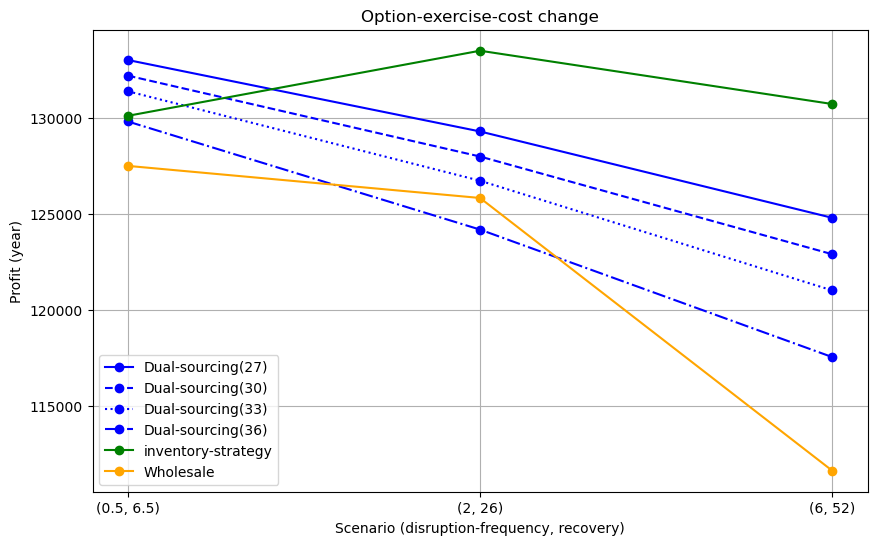

In [41]:
import pandas as pd
import matplotlib.pyplot as plt

# 파일 이름 리스트
file_names = [
    "Data_Dual-sourcing_0.5_6.5_0.1_27.csv",
    "Data_Dual-sourcing_2_26_0.1_27.csv",
    "Data_Dual-sourcing_6_52_0.1_27.csv",
    "Data_Dual-sourcing_0.5_6.5_0.1_30.csv",
    "Data_Dual-sourcing_2_26_0.1_30.csv",
    "Data_Dual-sourcing_6_52_0.1_30.csv",
    "Data_Dual-sourcing_0.5_6.5_0.1_33.csv",
    "Data_Dual-sourcing_2_26_0.1_33.csv",
    "Data_Dual-sourcing_6_52_0.1_33.csv",
    "Data_Dual-sourcing_0.5_6.5_0.1_36.csv",
    "Data_Dual-sourcing_2_26_0.1_36.csv",
    "Data_Dual-sourcing_6_52_0.1_36.csv",
    "Data_inventory-strategy_0.5_6.5_0.1.csv",
    "Data_inventory-strategy_2_26_0.1.csv",
    "Data_inventory-strategy_6_52_0.1.csv",
    "Data_Wholesale_0.5_6.5_0.1.csv",
    "Data_Wholesale_2_26_0.1.csv",
    "Data_Wholesale_6_52_0.1.csv",
]

# 라벨과 x축 정보
labels = ["Dual-sourcing(27)", "Dual-sourcing(30)", "Dual-sourcing(33)", "Dual-sourcing(36)", "inventory-strategy", "Wholesale"]
x_ticks = ["(0.5, 6.5)", "(2, 26)", "(6, 52)"]

# 색상 및 스타일 설정
colors = {
    "Dual-sourcing(27)": "blue",
    "Dual-sourcing(30)": "blue",
    "Dual-sourcing(33)": "blue",
    "Dual-sourcing(36)": "blue",
    "inventory-strategy": "green",
    "Wholesale": "orange"
}
linestyles = {
    "Dual-sourcing(27)": "-",
    "Dual-sourcing(30)": "--",
    "Dual-sourcing(33)": ":",
    "Dual-sourcing(36)": "-.",
    "inventory-strategy": "-",
    "Wholesale": "-"
}

# 데이터를 저장할 딕셔너리
data = {label: [] for label in labels}

# 파일에서 profit의 마지막 값을 추출
for file_name in file_names:
    try:
        df = pd.read_csv(file_name)
        last_profit = df['profit'].iloc[-1] / 200
        if "Dual-sourcing_0.5_6.5_0.1_27" in file_name or "Dual-sourcing_2_26_0.1_27" in file_name or "Dual-sourcing_6_52_0.1_27" in file_name:
            data["Dual-sourcing(27)"].append(last_profit)
        elif "Dual-sourcing_0.5_6.5_0.1_30" in file_name or "Dual-sourcing_2_26_0.1_30" in file_name or "Dual-sourcing_6_52_0.1_30" in file_name:
            data["Dual-sourcing(30)"].append(last_profit)
        elif "Dual-sourcing_0.5_6.5_0.1_33" in file_name or "Dual-sourcing_2_26_0.1_33" in file_name or "Dual-sourcing_6_52_0.1_33" in file_name:
            data["Dual-sourcing(33)"].append(last_profit)
        elif "Dual-sourcing_0.5_6.5_0.1_36" in file_name or "Dual-sourcing_2_26_0.1_36" in file_name or "Dual-sourcing_6_52_0.1_36" in file_name:
            data["Dual-sourcing(36)"].append(last_profit)
        elif "inventory-strategy" in file_name:
            data["inventory-strategy"].append(last_profit)
        elif "Wholesale" in file_name:
            data["Wholesale"].append(last_profit)
    except FileNotFoundError:
        print(f"File not found: {file_name}")
    except Exception as e:
        print(f"Error processing file {file_name}: {e}")

# 라인 플롯 생성
plt.figure(figsize=(10, 6))

for label in labels:
    plt.plot(x_ticks, data[label], marker='o', label=label, color=colors[label], linestyle=linestyles[label])

# 플롯 꾸미기
plt.title("Option-exercise-cost change")
plt.xlabel("Scenario (disruption-frequency, recovery)")
plt.ylabel("Profit (year)")
plt.legend()
plt.grid(True)

# 플롯 표시
plt.show()



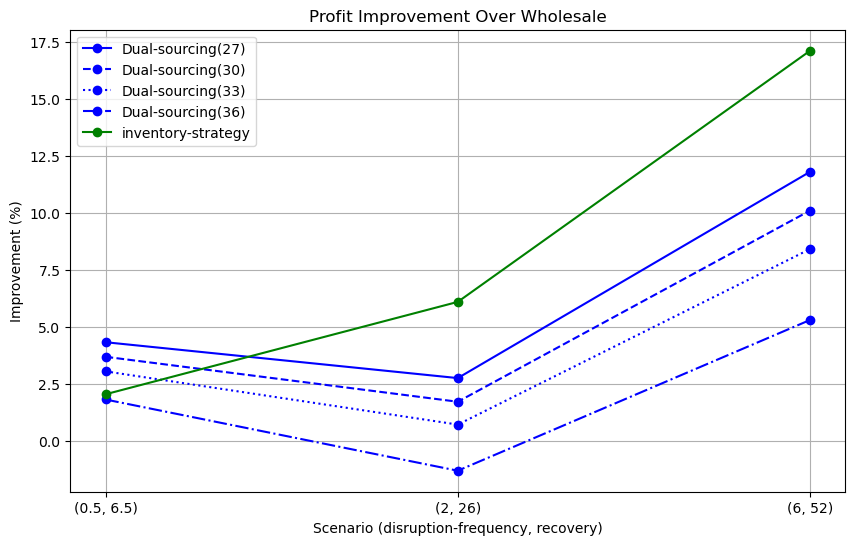

In [42]:
import pandas as pd
import matplotlib.pyplot as plt

# 파일 이름 리스트
file_names = [
    "Data_Dual-sourcing_0.5_6.5_0.1_27.csv",
    "Data_Dual-sourcing_2_26_0.1_27.csv",
    "Data_Dual-sourcing_6_52_0.1_27.csv",
    "Data_Dual-sourcing_0.5_6.5_0.1_30.csv",
    "Data_Dual-sourcing_2_26_0.1_30.csv",
    "Data_Dual-sourcing_6_52_0.1_30.csv",
    "Data_Dual-sourcing_0.5_6.5_0.1_33.csv",
    "Data_Dual-sourcing_2_26_0.1_33.csv",
    "Data_Dual-sourcing_6_52_0.1_33.csv",
    "Data_Dual-sourcing_0.5_6.5_0.1_36.csv",
    "Data_Dual-sourcing_2_26_0.1_36.csv",
    "Data_Dual-sourcing_6_52_0.1_36.csv",
    "Data_inventory-strategy_0.5_6.5_0.1.csv",
    "Data_inventory-strategy_2_26_0.1.csv",
    "Data_inventory-strategy_6_52_0.1.csv",
    "Data_Wholesale_0.5_6.5_0.1.csv",
    "Data_Wholesale_2_26_0.1.csv",
    "Data_Wholesale_6_52_0.1.csv",
]

# 라벨과 x축 정보
labels = ["Dual-sourcing(27)", "Dual-sourcing(30)", "Dual-sourcing(33)", "Dual-sourcing(36)", "inventory-strategy", "Wholesale"]
x_ticks = ["(0.5, 6.5)", "(2, 26)", "(6, 52)"]

# 색상 및 스타일 설정
colors = {
    "Dual-sourcing(27)": "blue",
    "Dual-sourcing(30)": "blue",
    "Dual-sourcing(33)": "blue",
    "Dual-sourcing(36)": "blue",
    "inventory-strategy": "green",
    "Wholesale": "orange"
}
linestyles = {
    "Dual-sourcing(27)": "-",
    "Dual-sourcing(30)": "--",
    "Dual-sourcing(33)": ":",
    "Dual-sourcing(36)": "-.",
    "inventory-strategy": "-",
    "Wholesale": "-"
}

# 데이터를 저장할 딕셔너리
data = {label: [] for label in labels}

# 파일에서 profit의 마지막 값을 추출
for file_name in file_names:
    try:
        df = pd.read_csv(file_name)
        last_profit = df['profit'].iloc[-1] / 200
        if "Dual-sourcing_0.5_6.5_0.1_27" in file_name or "Dual-sourcing_2_26_0.1_27" in file_name or "Dual-sourcing_6_52_0.1_27" in file_name:
            data["Dual-sourcing(27)"].append(last_profit)
        elif "Dual-sourcing_0.5_6.5_0.1_30" in file_name or "Dual-sourcing_2_26_0.1_30" in file_name or "Dual-sourcing_6_52_0.1_30" in file_name:
            data["Dual-sourcing(30)"].append(last_profit)
        elif "Dual-sourcing_0.5_6.5_0.1_33" in file_name or "Dual-sourcing_2_26_0.1_33" in file_name or "Dual-sourcing_6_52_0.1_33" in file_name:
            data["Dual-sourcing(33)"].append(last_profit)
        elif "Dual-sourcing_0.5_6.5_0.1_36" in file_name or "Dual-sourcing_2_26_0.1_36" in file_name or "Dual-sourcing_6_52_0.1_36" in file_name:
            data["Dual-sourcing(36)"].append(last_profit)
        elif "inventory-strategy" in file_name:
            data["inventory-strategy"].append(last_profit)
        elif "Wholesale" in file_name:
            data["Wholesale"].append(last_profit)
    except FileNotFoundError:
        print(f"File not found: {file_name}")
    except Exception as e:
        print(f"Error processing file {file_name}: {e}")

# 수익 개선 비율 계산
improvement_ratios = {label: [] for label in labels if label != "Wholesale"}

for i in range(len(data["Wholesale"])):
    wholesale_profit = data["Wholesale"][i]
    for label in improvement_ratios:
        improvement = ((data[label][i] - wholesale_profit) / wholesale_profit) * 100
        improvement_ratios[label].append(improvement)

# 수익 개선 비율 플롯 생성
plt.figure(figsize=(10, 6))

for label in improvement_ratios:
    plt.plot(x_ticks, improvement_ratios[label], marker='o', label=label, color=colors[label], linestyle=linestyles[label])

# 플롯 꾸미기
plt.title("Profit Improvement Over Wholesale")
plt.xlabel("Scenario (disruption-frequency, recovery)")
plt.ylabel("Improvement (%)")
plt.legend()
plt.grid(True)

# 플롯 표시
plt.show()


## inventory-holding-cost에 따른 변화 (2, 5, 8, 10)

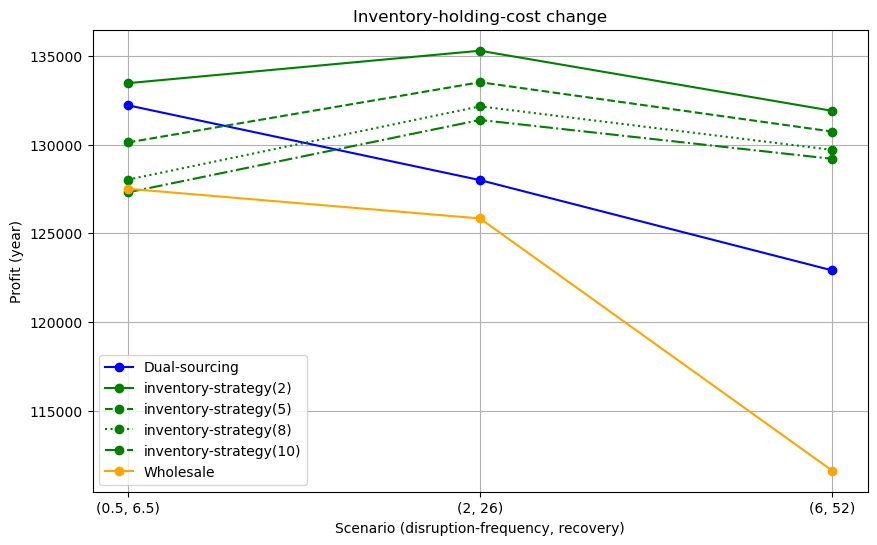

In [45]:
import pandas as pd
import matplotlib.pyplot as plt

# 파일 이름 리스트
file_names = [
    "Data_Dual-sourcing_0.5_6.5_0.1.csv",
    "Data_Dual-sourcing_2_26_0.1.csv",
    "Data_Dual-sourcing_6_52_0.1.csv",
    "Data_inventory-strategy_0.5_6.5_0.1_2.csv",
    "Data_inventory-strategy_2_26_0.1_2.csv",
    "Data_inventory-strategy_6_52_0.1_2.csv",
    "Data_inventory-strategy_0.5_6.5_0.1_5.csv",
    "Data_inventory-strategy_2_26_0.1_5.csv",
    "Data_inventory-strategy_6_52_0.1_5.csv",
    "Data_inventory-strategy_0.5_6.5_0.1_8.csv",
    "Data_inventory-strategy_2_26_0.1_8.csv",
    "Data_inventory-strategy_6_52_0.1_8.csv",
    "Data_inventory-strategy_0.5_6.5_0.1_10.csv",
    "Data_inventory-strategy_2_26_0.1_10.csv",
    "Data_inventory-strategy_6_52_0.1_10.csv",
    "Data_Wholesale_0.5_6.5_0.1.csv",
    "Data_Wholesale_2_26_0.1.csv",
    "Data_Wholesale_6_52_0.1.csv",
]

# 라벨과 x축 정보
labels = ["Dual-sourcing", "inventory-strategy(2)", "inventory-strategy(5)", "inventory-strategy(8)", "inventory-strategy(10)", "Wholesale"]
x_ticks = ["(0.5, 6.5)", "(2, 26)", "(6, 52)"]

# 색상 및 스타일 설정
colors = {
    "Dual-sourcing": "blue",
    "inventory-strategy(2)": "green",
    "inventory-strategy(5)": "green",
    "inventory-strategy(8)": "green",
    "inventory-strategy(10)": "green",
    "Wholesale": "orange"
}
linestyles = {
    "Dual-sourcing": "-",
    "inventory-strategy(2)": "-",
    "inventory-strategy(5)": "--",
    "inventory-strategy(8)": ":",
    "inventory-strategy(10)": "-.",
    "Wholesale": "-"
}

# 데이터를 저장할 딕셔너리
data = {label: [] for label in labels}

# 파일에서 profit의 마지막 값을 추출
for file_name in file_names:
    try:
        df = pd.read_csv(file_name)
        last_profit = df['profit'].iloc[-1] / 200

        if "Dual-sourcing" in file_name:
            data["Dual-sourcing"].append(last_profit)
        elif "inventory-strategy_0.5_6.5_0.1_2" in file_name or "inventory-strategy_2_26_0.1_2" in file_name or "inventory-strategy_6_52_0.1_2" in file_name:
            data["inventory-strategy(2)"].append(last_profit)
        elif "inventory-strategy_0.5_6.5_0.1_5" in file_name or "inventory-strategy_2_26_0.1_5" in file_name or "inventory-strategy_6_52_0.1_5" in file_name:
            data["inventory-strategy(5)"].append(last_profit)
        elif "inventory-strategy_0.5_6.5_0.1_8" in file_name or "inventory-strategy_2_26_0.1_8" in file_name or "inventory-strategy_6_52_0.1_8" in file_name:
            data["inventory-strategy(8)"].append(last_profit)
        elif "inventory-strategy_0.5_6.5_0.1_10" in file_name or "inventory-strategy_2_26_0.1_10" in file_name or "inventory-strategy_6_52_0.1_10" in file_name:
            data["inventory-strategy(10)"].append(last_profit)
        elif "Wholesale" in file_name:
            data["Wholesale"].append(last_profit)
    except FileNotFoundError:
        print(f"File not found: {file_name}")
    except Exception as e:
        print(f"Error processing file {file_name}: {e}")

# 라인 플롯 생성
plt.figure(figsize=(10, 6))

for label in labels:
    plt.plot(x_ticks, data[label], marker='o', label=label, color=colors[label], linestyle=linestyles[label])

# 플롯 꾸미기
plt.title("Inventory-holding-cost change")
plt.xlabel("Scenario (disruption-frequency, recovery)")
plt.ylabel("Profit (year)")
plt.legend()
plt.grid(True)

# 플롯 표시
plt.show()


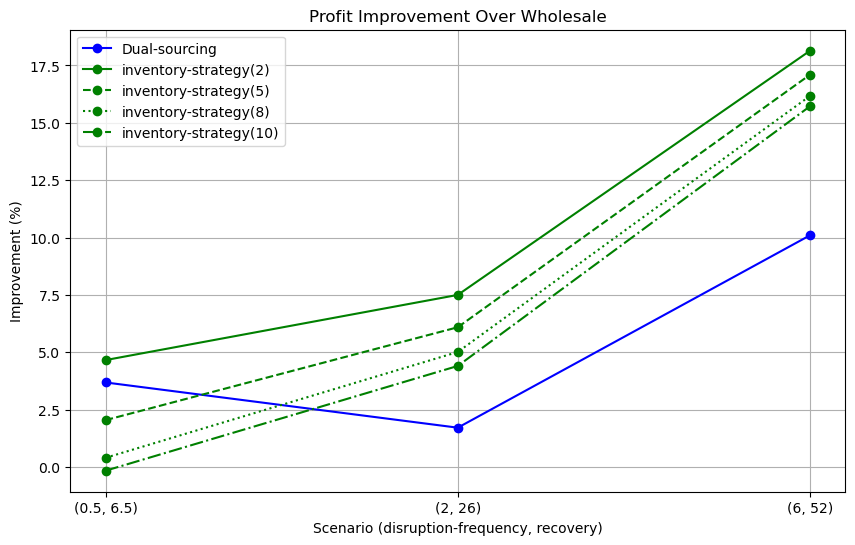

In [46]:
import pandas as pd
import matplotlib.pyplot as plt

# 파일 이름 리스트
file_names = [
    "Data_Dual-sourcing_0.5_6.5_0.1.csv",
    "Data_Dual-sourcing_2_26_0.1.csv",
    "Data_Dual-sourcing_6_52_0.1.csv",
    "Data_inventory-strategy_0.5_6.5_0.1_2.csv",
    "Data_inventory-strategy_2_26_0.1_2.csv",
    "Data_inventory-strategy_6_52_0.1_2.csv",
    "Data_inventory-strategy_0.5_6.5_0.1_5.csv",
    "Data_inventory-strategy_2_26_0.1_5.csv",
    "Data_inventory-strategy_6_52_0.1_5.csv",
    "Data_inventory-strategy_0.5_6.5_0.1_8.csv",
    "Data_inventory-strategy_2_26_0.1_8.csv",
    "Data_inventory-strategy_6_52_0.1_8.csv",
    "Data_inventory-strategy_0.5_6.5_0.1_10.csv",
    "Data_inventory-strategy_2_26_0.1_10.csv",
    "Data_inventory-strategy_6_52_0.1_10.csv",
    "Data_Wholesale_0.5_6.5_0.1.csv",
    "Data_Wholesale_2_26_0.1.csv",
    "Data_Wholesale_6_52_0.1.csv",
]

# 라벨과 x축 정보
labels = ["Dual-sourcing", "inventory-strategy(2)", "inventory-strategy(5)", "inventory-strategy(8)", "inventory-strategy(10)", "Wholesale"]
x_ticks = ["(0.5, 6.5)", "(2, 26)", "(6, 52)"]

# 색상 및 스타일 설정
colors = {
    "Dual-sourcing": "blue",
    "inventory-strategy(2)": "green",
    "inventory-strategy(5)": "green",
    "inventory-strategy(8)": "green",
    "inventory-strategy(10)": "green",
    "Wholesale": "orange"
}
linestyles = {
    "Dual-sourcing": "-",
    "inventory-strategy(2)": "-",
    "inventory-strategy(5)": "--",
    "inventory-strategy(8)": ":",
    "inventory-strategy(10)": "-.",
    "Wholesale": "-"
}

# 데이터를 저장할 딕셔너리
data = {label: [] for label in labels}

# 파일에서 profit의 마지막 값을 추출
for file_name in file_names:
    try:
        df = pd.read_csv(file_name)
        last_profit = df['profit'].iloc[-1] / 200

        if "Dual-sourcing" in file_name:
            data["Dual-sourcing"].append(last_profit)
        elif "inventory-strategy_0.5_6.5_0.1_2" in file_name or "inventory-strategy_2_26_0.1_2" in file_name or "inventory-strategy_6_52_0.1_2" in file_name:
            data["inventory-strategy(2)"].append(last_profit)
        elif "inventory-strategy_0.5_6.5_0.1_5" in file_name or "inventory-strategy_2_26_0.1_5" in file_name or "inventory-strategy_6_52_0.1_5" in file_name:
            data["inventory-strategy(5)"].append(last_profit)
        elif "inventory-strategy_0.5_6.5_0.1_8" in file_name or "inventory-strategy_2_26_0.1_8" in file_name or "inventory-strategy_6_52_0.1_8" in file_name:
            data["inventory-strategy(8)"].append(last_profit)
        elif "inventory-strategy_0.5_6.5_0.1_10" in file_name or "inventory-strategy_2_26_0.1_10" in file_name or "inventory-strategy_6_52_0.1_10" in file_name:
            data["inventory-strategy(10)"].append(last_profit)
        elif "Wholesale" in file_name:
            data["Wholesale"].append(last_profit)
    except FileNotFoundError:
        print(f"File not found: {file_name}")
    except Exception as e:
        print(f"Error processing file {file_name}: {e}")

# 수익 개선 비율 계산
improvement_ratios = {label: [] for label in labels if label != "Wholesale"}

for i in range(len(data["Wholesale"])):
    wholesale_profit = data["Wholesale"][i]
    for label in improvement_ratios:
        improvement = ((data[label][i] - wholesale_profit) / wholesale_profit) * 100
        improvement_ratios[label].append(improvement)

# 수익 개선 비율 플롯 생성
plt.figure(figsize=(10, 6))

for label in improvement_ratios:
    plt.plot(x_ticks, improvement_ratios[label], label=label, color=colors[label], linestyle=linestyles[label], marker = "o")

# 플롯 꾸미기
plt.title("Profit Improvement Over Wholesale")
plt.xlabel("Scenario (disruption-frequency, recovery)")
plt.ylabel("Improvement (%)")
plt.legend()
plt.grid(True)

# 플롯 표시
plt.show()


## ordering-cost-of-primary-supplier 값 변화 (10, 20, 30, 40)

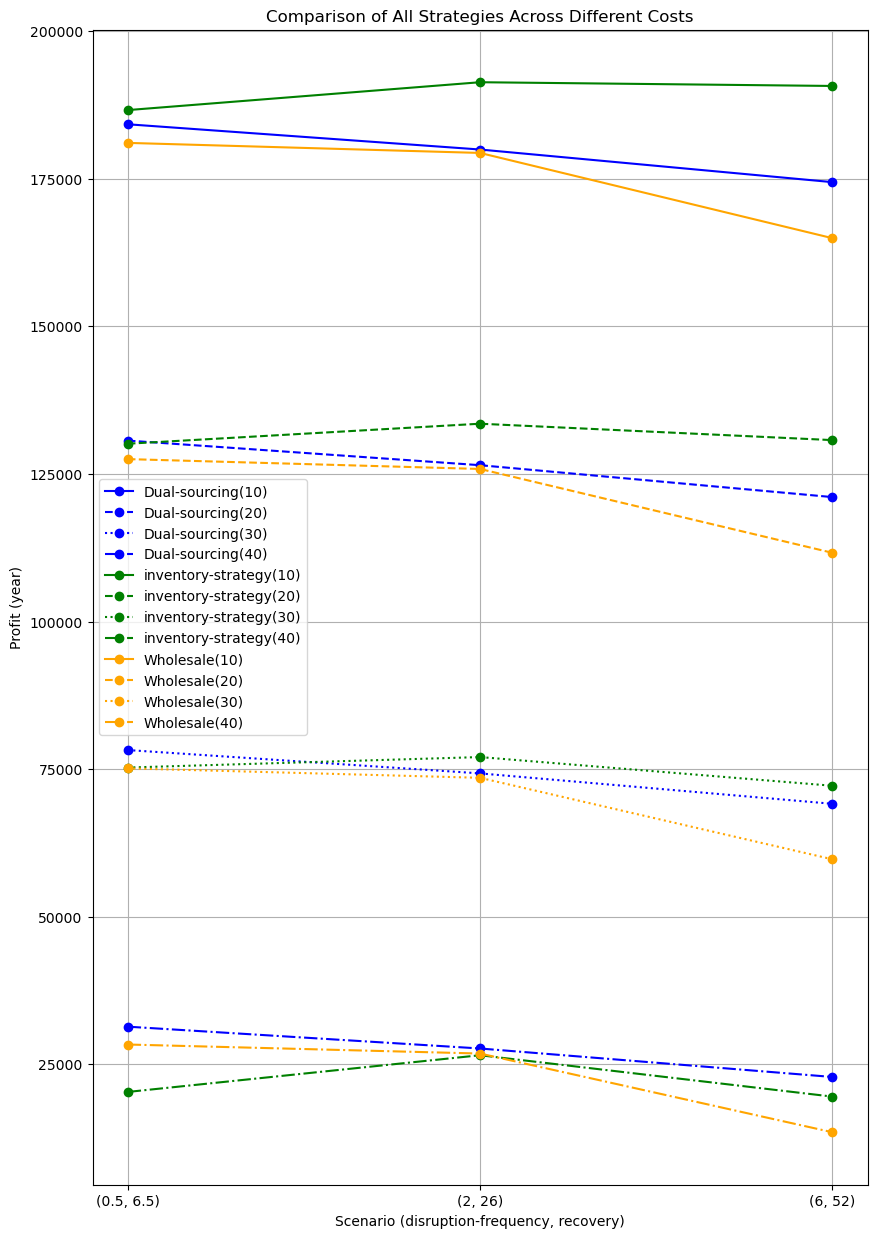

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

# 기본 설정
scenarios = [(0.5, 6.5), (2, 26), (6, 52)]
costs = [10, 20, 30, 40]
strategies = ["Dual-sourcing", "inventory-strategy", "Wholesale"]

# 라벨과 스타일 설정
colors = {"Dual-sourcing": "blue", "inventory-strategy": "green", "Wholesale": "orange"}
linestyles = {10: "-", 20: "--", 30: ":", 40: "-."}

# 데이터를 저장할 딕셔너리
data = {f"{strategy}({cost})": [] for strategy in strategies for cost in costs}

# 데이터 읽기 및 처리
for strategy in strategies:
    for cost in costs:
        for scenario in scenarios:
            file_name = f"Data_{strategy}_{scenario[0]}_{scenario[1]}_0.1_w{cost}.csv"
            try:
                df = pd.read_csv(file_name)
                last_profit = df['profit'].iloc[-1] / 200
                data[f"{strategy}({cost})"].append(last_profit)
            except FileNotFoundError:
                print(f"File not found: {file_name}")
            except Exception as e:
                print(f"Error processing file {file_name}: {e}")

# 라인 플롯 생성
plt.figure(figsize=(10, 15))

for strategy in strategies:
    for cost in costs:
        label = f"{strategy}({cost})"
        plt.plot([f"({s[0]}, {s[1]})" for s in scenarios], data[label],
                 marker='o', label=label, color=colors[strategy], linestyle=linestyles[cost])

# 플롯 꾸미기
plt.title("Comparison of All Strategies Across Different Costs")
plt.xlabel("Scenario (disruption-frequency, recovery)")
plt.ylabel("Profit (year)")
plt.legend()
plt.grid(True)

# 플롯 표시
plt.show()



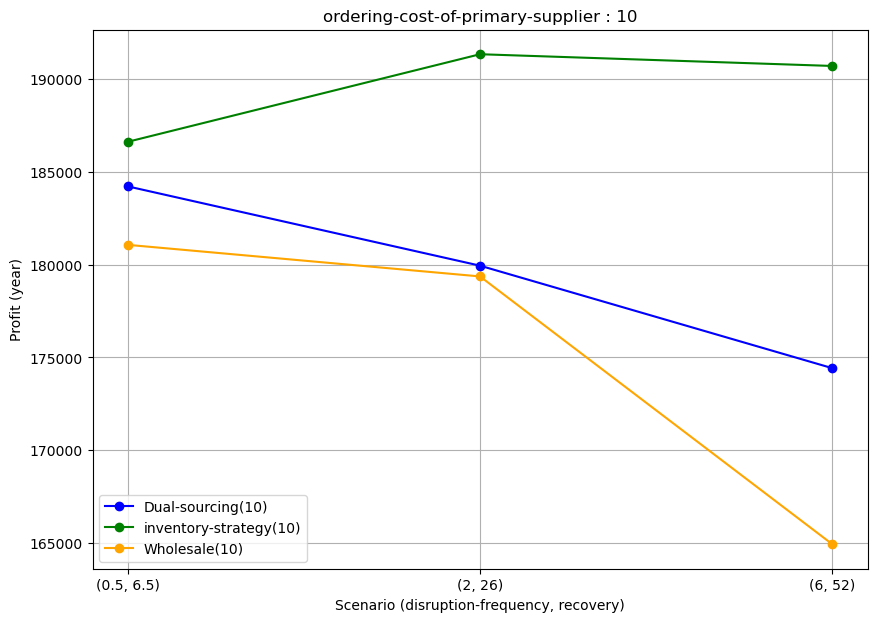

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

# 기본 설정
scenarios = [(0.5, 6.5), (2, 26), (6, 52)]
costs = [10]
strategies = ["Dual-sourcing", "inventory-strategy", "Wholesale"]

# 라벨과 스타일 설정
colors = {"Dual-sourcing": "blue", "inventory-strategy": "green", "Wholesale": "orange"}
linestyles = {10: "-", 20: "--", 30: ":", 40: "-."}

# 데이터를 저장할 딕셔너리
data = {f"{strategy}({cost})": [] for strategy in strategies for cost in costs}

# 데이터 읽기 및 처리
for strategy in strategies:
    for cost in costs:
        for scenario in scenarios:
            file_name = f"Data_{strategy}_{scenario[0]}_{scenario[1]}_0.1_w{cost}.csv"
            try:
                df = pd.read_csv(file_name)
                last_profit = df['profit'].iloc[-1] / 200
                data[f"{strategy}({cost})"].append(last_profit)
            except FileNotFoundError:
                print(f"File not found: {file_name}")
            except Exception as e:
                print(f"Error processing file {file_name}: {e}")

# 라인 플롯 생성
plt.figure(figsize=(10, 7))

for strategy in strategies:
    for cost in costs:
        label = f"{strategy}({cost})"
        plt.plot([f"({s[0]}, {s[1]})" for s in scenarios], data[label],
                 marker='o', label=label, color=colors[strategy], linestyle=linestyles[cost])

# 플롯 꾸미기
plt.title("ordering-cost-of-primary-supplier : 10")
plt.xlabel("Scenario (disruption-frequency, recovery)")
plt.ylabel("Profit (year)")
plt.legend()
plt.grid(True)

# 플롯 표시
plt.show()


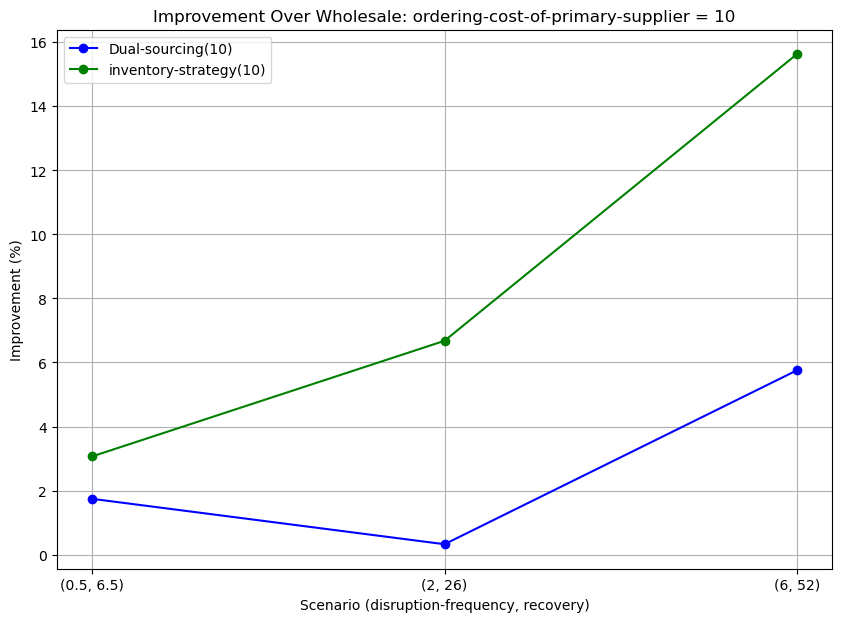

In [47]:
import pandas as pd
import matplotlib.pyplot as plt

# 기본 설정
scenarios = [(0.5, 6.5), (2, 26), (6, 52)]
costs = [10]
strategies = ["Dual-sourcing", "inventory-strategy", "Wholesale"]

# 라벨과 스타일 설정
colors = {"Dual-sourcing": "blue", "inventory-strategy": "green", "Wholesale": "orange"}
linestyles = {10: "-", 20: "--", 30: ":", 40: "-."}

# 데이터를 저장할 딕셔너리
data = {f"{strategy}({cost})": [] for strategy in strategies for cost in costs}

# 데이터 읽기 및 처리
for strategy in strategies:
    for cost in costs:
        for scenario in scenarios:
            file_name = f"Data_{strategy}_{scenario[0]}_{scenario[1]}_0.1_w{cost}.csv"
            try:
                df = pd.read_csv(file_name)
                last_profit = df['profit'].iloc[-1] / 200
                data[f"{strategy}({cost})"].append(last_profit)
            except FileNotFoundError:
                print(f"File not found: {file_name}")
            except Exception as e:
                print(f"Error processing file {file_name}: {e}")

# 개선도 계산
def calculate_improvement(data, scenarios, costs):
    improvement_ratios = {f"{strategy}({cost})": [] for strategy in strategies if strategy != "Wholesale" for cost in costs}
    
    for i in range(len(scenarios)):
        wholesale_profit = data[f"Wholesale({costs[0]})"][i]  # Wholesale 기준
        for strategy in strategies:
            if strategy != "Wholesale":
                for cost in costs:
                    label = f"{strategy}({cost})"
                    improvement = ((data[label][i] - wholesale_profit) / wholesale_profit) * 100
                    improvement_ratios[label].append(improvement)
    return improvement_ratios

improvement_ratios = calculate_improvement(data, scenarios, costs)

# 개선도 플롯 생성
plt.figure(figsize=(10, 7))

for strategy in strategies:
    if strategy != "Wholesale":
        for cost in costs:
            label = f"{strategy}({cost})"
            plt.plot([f"({s[0]}, {s[1]})" for s in scenarios], improvement_ratios[label],
                     marker='o', label=label, color=colors[strategy], linestyle=linestyles[cost])

# 플롯 꾸미기
plt.title("Improvement Over Wholesale: ordering-cost-of-primary-supplier = 10")
plt.xlabel("Scenario (disruption-frequency, recovery)")
plt.ylabel("Improvement (%)")
plt.legend()
plt.grid(True)

# 플롯 표시
plt.show()


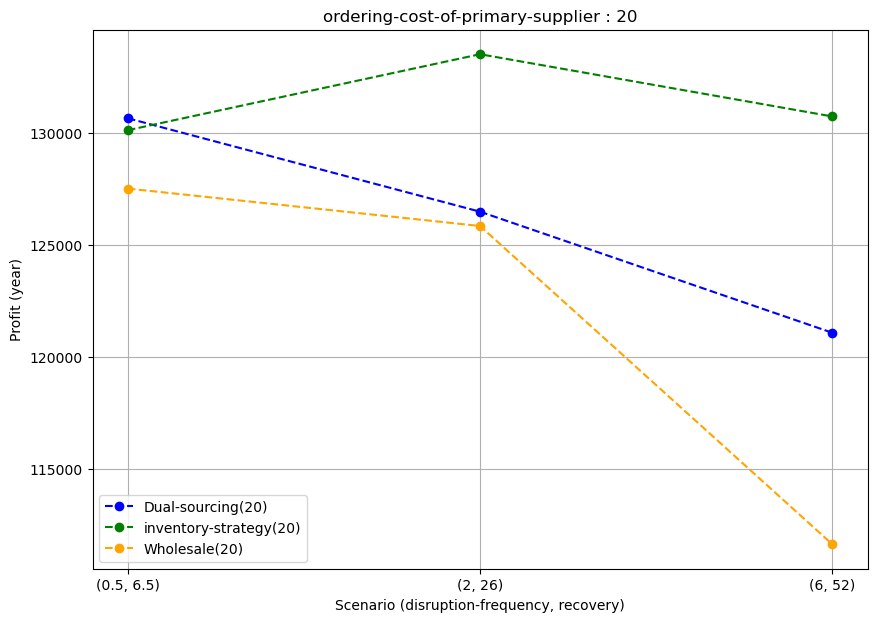

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

# 기본 설정
scenarios = [(0.5, 6.5), (2, 26), (6, 52)]
costs = [20]
strategies = ["Dual-sourcing", "inventory-strategy", "Wholesale"]

# 라벨과 스타일 설정
colors = {"Dual-sourcing": "blue", "inventory-strategy": "green", "Wholesale": "orange"}
linestyles = {10: "-", 20: "--", 30: ":", 40: "-."}

# 데이터를 저장할 딕셔너리
data = {f"{strategy}({cost})": [] for strategy in strategies for cost in costs}

# 데이터 읽기 및 처리
for strategy in strategies:
    for cost in costs:
        for scenario in scenarios:
            file_name = f"Data_{strategy}_{scenario[0]}_{scenario[1]}_0.1_w{cost}.csv"
            try:
                df = pd.read_csv(file_name)
                last_profit = df['profit'].iloc[-1] / 200
                data[f"{strategy}({cost})"].append(last_profit)
            except FileNotFoundError:
                print(f"File not found: {file_name}")
            except Exception as e:
                print(f"Error processing file {file_name}: {e}")

# 라인 플롯 생성
plt.figure(figsize=(10, 7))

for strategy in strategies:
    for cost in costs:
        label = f"{strategy}({cost})"
        plt.plot([f"({s[0]}, {s[1]})" for s in scenarios], data[label],
                 marker='o', label=label, color=colors[strategy], linestyle=linestyles[cost])

# 플롯 꾸미기
plt.title("ordering-cost-of-primary-supplier : 20")
plt.xlabel("Scenario (disruption-frequency, recovery)")
plt.ylabel("Profit (year)")
plt.legend()
plt.grid(True)

# 플롯 표시
plt.show()

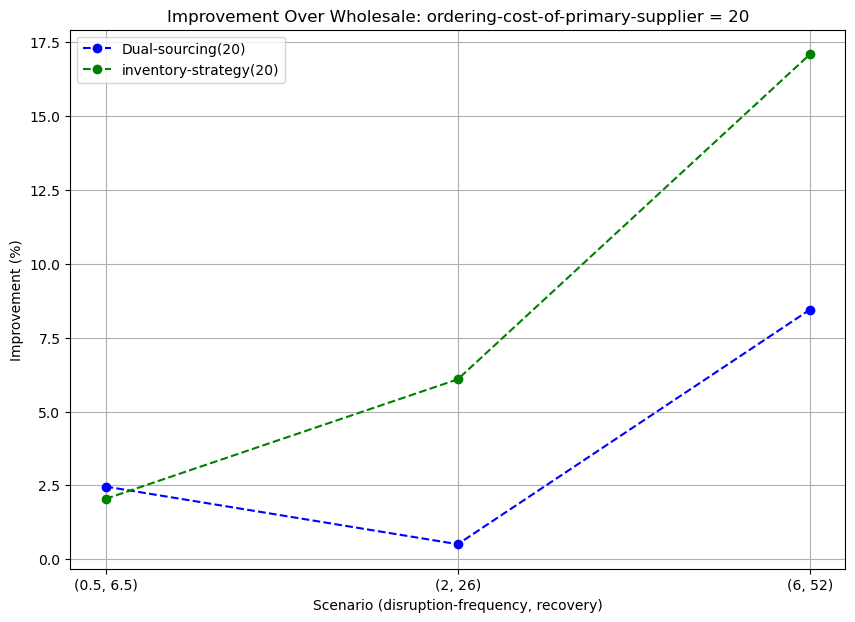

In [48]:
import pandas as pd
import matplotlib.pyplot as plt

# 기본 설정
scenarios = [(0.5, 6.5), (2, 26), (6, 52)]
costs = [20]
strategies = ["Dual-sourcing", "inventory-strategy", "Wholesale"]

# 라벨과 스타일 설정
colors = {"Dual-sourcing": "blue", "inventory-strategy": "green", "Wholesale": "orange"}
linestyles = {10: "-", 20: "--", 30: ":", 40: "-."}

# 데이터를 저장할 딕셔너리
data = {f"{strategy}({cost})": [] for strategy in strategies for cost in costs}

# 데이터 읽기 및 처리
for strategy in strategies:
    for cost in costs:
        for scenario in scenarios:
            file_name = f"Data_{strategy}_{scenario[0]}_{scenario[1]}_0.1_w{cost}.csv"
            try:
                df = pd.read_csv(file_name)
                last_profit = df['profit'].iloc[-1] / 200
                data[f"{strategy}({cost})"].append(last_profit)
            except FileNotFoundError:
                print(f"File not found: {file_name}")
            except Exception as e:
                print(f"Error processing file {file_name}: {e}")

# 개선도 계산
def calculate_improvement(data, scenarios, costs):
    improvement_ratios = {f"{strategy}({cost})": [] for strategy in strategies if strategy != "Wholesale" for cost in costs}
    
    for i in range(len(scenarios)):
        wholesale_profit = data[f"Wholesale({costs[0]})"][i]  # Wholesale 기준
        for strategy in strategies:
            if strategy != "Wholesale":
                for cost in costs:
                    label = f"{strategy}({cost})"
                    improvement = ((data[label][i] - wholesale_profit) / wholesale_profit) * 100
                    improvement_ratios[label].append(improvement)
    return improvement_ratios

improvement_ratios = calculate_improvement(data, scenarios, costs)

# 개선도 플롯 생성
plt.figure(figsize=(10, 7))

for strategy in strategies:
    if strategy != "Wholesale":
        for cost in costs:
            label = f"{strategy}({cost})"
            plt.plot([f"({s[0]}, {s[1]})" for s in scenarios], improvement_ratios[label],
                     marker='o', label=label, color=colors[strategy], linestyle=linestyles[cost])

# 플롯 꾸미기
plt.title("Improvement Over Wholesale: ordering-cost-of-primary-supplier = 20")
plt.xlabel("Scenario (disruption-frequency, recovery)")
plt.ylabel("Improvement (%)")
plt.legend()
plt.grid(True)

# 플롯 표시
plt.show()


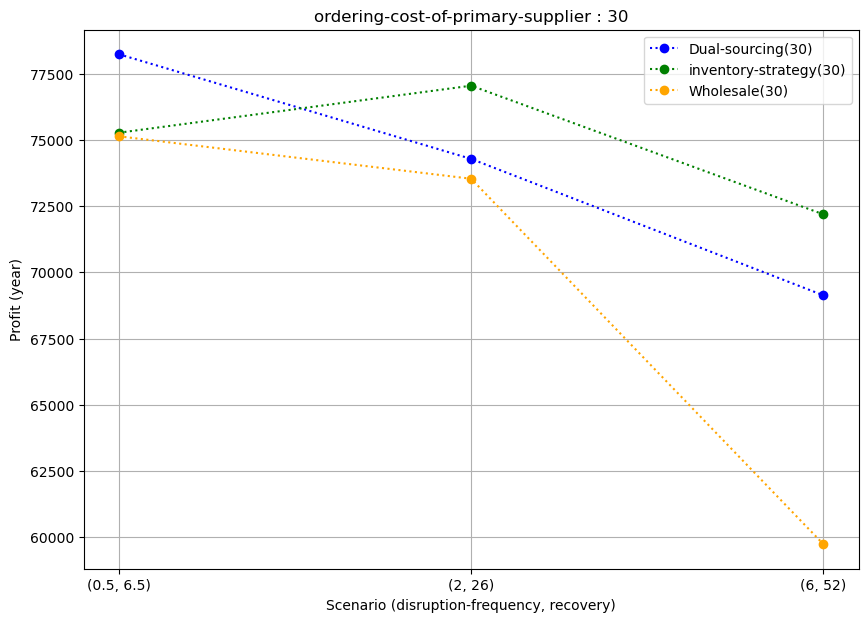

In [27]:
import pandas as pd
import matplotlib.pyplot as plt

# 기본 설정
scenarios = [(0.5, 6.5), (2, 26), (6, 52)]
costs = [30]
strategies = ["Dual-sourcing", "inventory-strategy", "Wholesale"]

# 라벨과 스타일 설정
colors = {"Dual-sourcing": "blue", "inventory-strategy": "green", "Wholesale": "orange"}
linestyles = {10: "-", 20: "--", 30: ":", 40: "-."}

# 데이터를 저장할 딕셔너리
data = {f"{strategy}({cost})": [] for strategy in strategies for cost in costs}

# 데이터 읽기 및 처리
for strategy in strategies:
    for cost in costs:
        for scenario in scenarios:
            file_name = f"Data_{strategy}_{scenario[0]}_{scenario[1]}_0.1_w{cost}.csv"
            try:
                df = pd.read_csv(file_name)
                last_profit = df['profit'].iloc[-1] / 200
                data[f"{strategy}({cost})"].append(last_profit)
            except FileNotFoundError:
                print(f"File not found: {file_name}")
            except Exception as e:
                print(f"Error processing file {file_name}: {e}")

# 라인 플롯 생성
plt.figure(figsize=(10, 7))

for strategy in strategies:
    for cost in costs:
        label = f"{strategy}({cost})"
        plt.plot([f"({s[0]}, {s[1]})" for s in scenarios], data[label],
                 marker='o', label=label, color=colors[strategy], linestyle=linestyles[cost])

# 플롯 꾸미기
plt.title("ordering-cost-of-primary-supplier : 30")
plt.xlabel("Scenario (disruption-frequency, recovery)")
plt.ylabel("Profit (year)")
plt.legend()
plt.grid(True)

# 플롯 표시
plt.show()

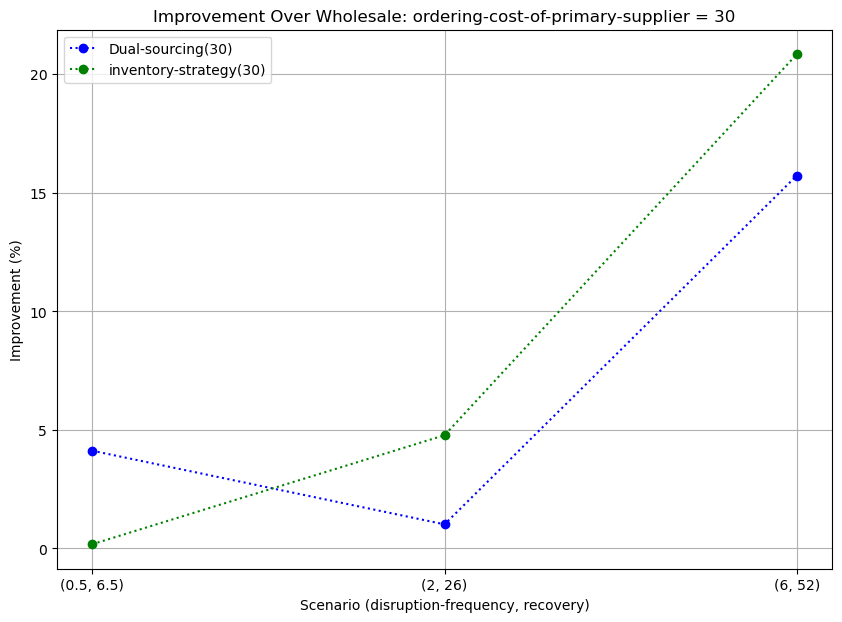

In [49]:
import pandas as pd
import matplotlib.pyplot as plt

# 기본 설정
scenarios = [(0.5, 6.5), (2, 26), (6, 52)]
costs = [30]
strategies = ["Dual-sourcing", "inventory-strategy", "Wholesale"]

# 라벨과 스타일 설정
colors = {"Dual-sourcing": "blue", "inventory-strategy": "green", "Wholesale": "orange"}
linestyles = {10: "-", 20: "--", 30: ":", 40: "-."}

# 데이터를 저장할 딕셔너리
data = {f"{strategy}({cost})": [] for strategy in strategies for cost in costs}

# 데이터 읽기 및 처리
for strategy in strategies:
    for cost in costs:
        for scenario in scenarios:
            file_name = f"Data_{strategy}_{scenario[0]}_{scenario[1]}_0.1_w{cost}.csv"
            try:
                df = pd.read_csv(file_name)
                last_profit = df['profit'].iloc[-1] / 200
                data[f"{strategy}({cost})"].append(last_profit)
            except FileNotFoundError:
                print(f"File not found: {file_name}")
            except Exception as e:
                print(f"Error processing file {file_name}: {e}")

# 개선도 계산
def calculate_improvement(data, scenarios, costs):
    improvement_ratios = {f"{strategy}({cost})": [] for strategy in strategies if strategy != "Wholesale" for cost in costs}
    
    for i in range(len(scenarios)):
        wholesale_profit = data[f"Wholesale({costs[0]})"][i]  # Wholesale 기준
        for strategy in strategies:
            if strategy != "Wholesale":
                for cost in costs:
                    label = f"{strategy}({cost})"
                    improvement = ((data[label][i] - wholesale_profit) / wholesale_profit) * 100
                    improvement_ratios[label].append(improvement)
    return improvement_ratios

improvement_ratios = calculate_improvement(data, scenarios, costs)

# 개선도 플롯 생성
plt.figure(figsize=(10, 7))

for strategy in strategies:
    if strategy != "Wholesale":
        for cost in costs:
            label = f"{strategy}({cost})"
            plt.plot([f"({s[0]}, {s[1]})" for s in scenarios], improvement_ratios[label],
                     marker='o', label=label, color=colors[strategy], linestyle=linestyles[cost])

# 플롯 꾸미기
plt.title("Improvement Over Wholesale: ordering-cost-of-primary-supplier = 30")
plt.xlabel("Scenario (disruption-frequency, recovery)")
plt.ylabel("Improvement (%)")
plt.legend()
plt.grid(True)

# 플롯 표시
plt.show()


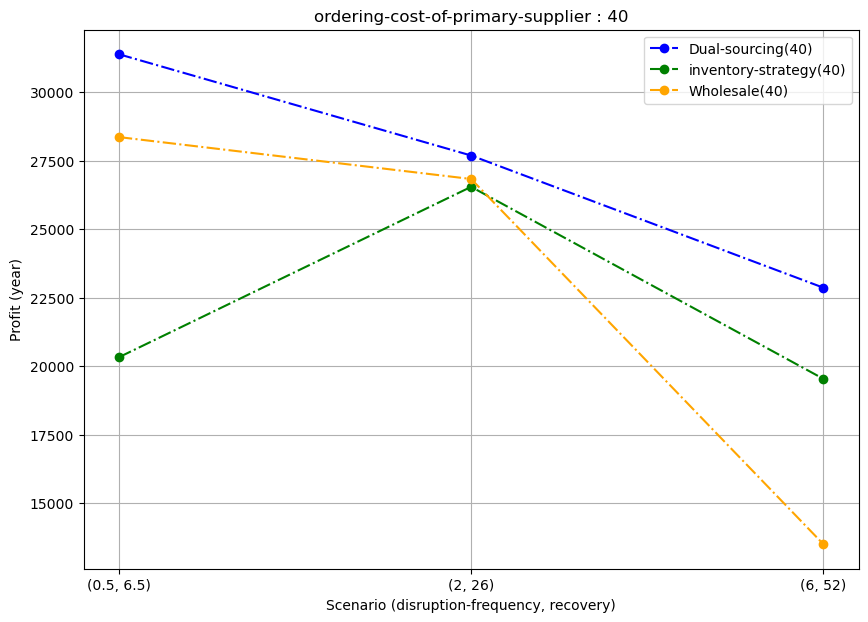

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

# 기본 설정
scenarios = [(0.5, 6.5), (2, 26), (6, 52)]
costs = [40]
strategies = ["Dual-sourcing", "inventory-strategy", "Wholesale"]

# 라벨과 스타일 설정
colors = {"Dual-sourcing": "blue", "inventory-strategy": "green", "Wholesale": "orange"}
linestyles = {10: "-", 20: "--", 30: ":", 40: "-."}

# 데이터를 저장할 딕셔너리
data = {f"{strategy}({cost})": [] for strategy in strategies for cost in costs}

# 데이터 읽기 및 처리
for strategy in strategies:
    for cost in costs:
        for scenario in scenarios:
            file_name = f"Data_{strategy}_{scenario[0]}_{scenario[1]}_0.1_w{cost}.csv"
            try:
                df = pd.read_csv(file_name)
                last_profit = df['profit'].iloc[-1] / 200
                data[f"{strategy}({cost})"].append(last_profit)
            except FileNotFoundError:
                print(f"File not found: {file_name}")
            except Exception as e:
                print(f"Error processing file {file_name}: {e}")

# 라인 플롯 생성
plt.figure(figsize=(10, 7))

for strategy in strategies:
    for cost in costs:
        label = f"{strategy}({cost})"
        plt.plot([f"({s[0]}, {s[1]})" for s in scenarios], data[label],
                 marker='o', label=label, color=colors[strategy], linestyle=linestyles[cost])

# 플롯 꾸미기
plt.title("ordering-cost-of-primary-supplier : 40")
plt.xlabel("Scenario (disruption-frequency, recovery)")
plt.ylabel("Profit (year)")
plt.legend()
plt.grid(True)

# 플롯 표시
plt.show()

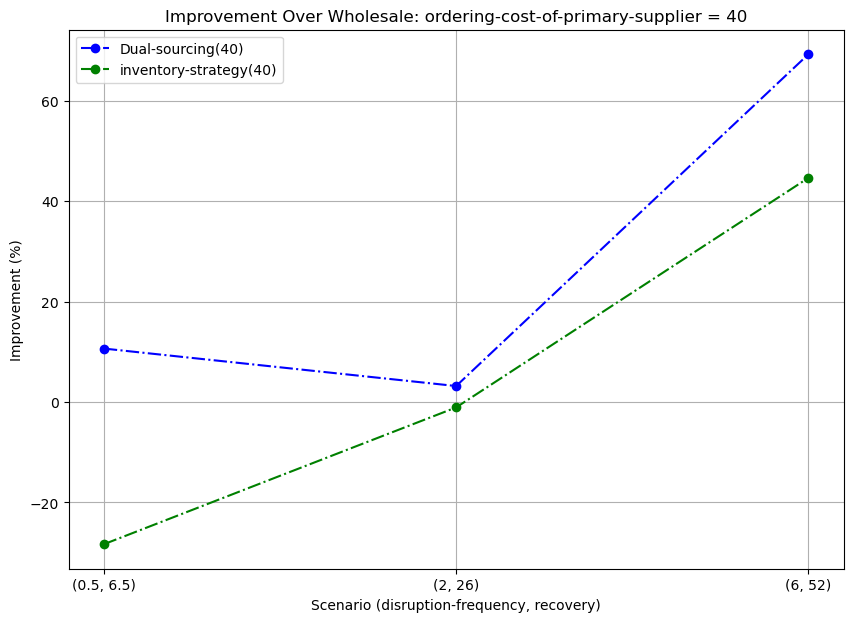

In [50]:
import pandas as pd
import matplotlib.pyplot as plt

# 기본 설정
scenarios = [(0.5, 6.5), (2, 26), (6, 52)]
costs = [40]
strategies = ["Dual-sourcing", "inventory-strategy", "Wholesale"]

# 라벨과 스타일 설정
colors = {"Dual-sourcing": "blue", "inventory-strategy": "green", "Wholesale": "orange"}
linestyles = {10: "-", 20: "--", 30: ":", 40: "-."}

# 데이터를 저장할 딕셔너리
data = {f"{strategy}({cost})": [] for strategy in strategies for cost in costs}

# 데이터 읽기 및 처리
for strategy in strategies:
    for cost in costs:
        for scenario in scenarios:
            file_name = f"Data_{strategy}_{scenario[0]}_{scenario[1]}_0.1_w{cost}.csv"
            try:
                df = pd.read_csv(file_name)
                last_profit = df['profit'].iloc[-1] / 200
                data[f"{strategy}({cost})"].append(last_profit)
            except FileNotFoundError:
                print(f"File not found: {file_name}")
            except Exception as e:
                print(f"Error processing file {file_name}: {e}")

# 개선도 계산
def calculate_improvement(data, scenarios, costs):
    improvement_ratios = {f"{strategy}({cost})": [] for strategy in strategies if strategy != "Wholesale" for cost in costs}
    
    for i in range(len(scenarios)):
        wholesale_profit = data[f"Wholesale({costs[0]})"][i]  # Wholesale 기준
        for strategy in strategies:
            if strategy != "Wholesale":
                for cost in costs:
                    label = f"{strategy}({cost})"
                    improvement = ((data[label][i] - wholesale_profit) / wholesale_profit) * 100
                    improvement_ratios[label].append(improvement)
    return improvement_ratios

improvement_ratios = calculate_improvement(data, scenarios, costs)

# 개선도 플롯 생성
plt.figure(figsize=(10, 7))

for strategy in strategies:
    if strategy != "Wholesale":
        for cost in costs:
            label = f"{strategy}({cost})"
            plt.plot([f"({s[0]}, {s[1]})" for s in scenarios], improvement_ratios[label],
                     marker='o', label=label, color=colors[strategy], linestyle=linestyles[cost])

# 플롯 꾸미기
plt.title("Improvement Over Wholesale: ordering-cost-of-primary-supplier = 40")
plt.xlabel("Scenario (disruption-frequency, recovery)")
plt.ylabel("Improvement (%)")
plt.legend()
plt.grid(True)

# 플롯 표시
plt.show()
